# Lab 6. Natural Language Processing
This lab sheet aims to help us understand more about natural language processing, as we are going to study this
new topic, and use it to solve 3 problems, which will be divided into the following tasks:
1. The sentiment analysis problem
2. The text classification problem
3. The topic modelling problem

## Task 6.1 Sentiment Analysis
###Problem Description

This first task presents us with a sentiment analysis problem, in which we will take movie reviews, and perform a sentiment analysis of these reviews. This task is also known as the “Hello World” problem for NLP (natural language
processing). Despite its popularity, it is still difficult to perform this analysis, while getting almost flawless results and performances, as there are many "human attributes" to writting, such as sarcasm, slang, and other writing techniques or styles that make it hard for the computer to fully understand and process.

In order to solve this task, we will use a dataset called "movie_reviews" (from the nltk corpus), which contains 1000 positive reviews, as well as 1000 negative ones.

The following figure shows us an excerpt of a review, as an example of the type of language and writing used in the reviews presented in this dataset.

![Figure 1](https://github.com/LeomPina/AIreports/blob/main/w7_6.1.1.png?raw=true)

Figure 1

In our implemented solution for this problem, we will use the simple word count features, as we will count the occurrence of each word in the document, such as "tf" and "tf-idf", in which "tf" stands for term frequency, and "idf" for inverse document frequency. We can see how to calculate these features in the figure below taken from the lecture.

![Figure 2](https://github.com/LeomPina/AIreports/blob/main/w7_6.1.2.png?raw=true)

Figure 2

By using this technique, we are going to use one-hot vectors, which contain a binary representation of the words processed (for each word the vector representation is all 0s except for a 1 value), and then accumulate these one-hot vectors to create a new vector that has got all the frequencies of existing words in that document.

We will also use the Naïve Bayes method, as we used in a previous lab task, except in this task we will use the multinomial model, which uses a different model for probability distribution than the one previously used. This method will be necessary for text classification, in this case, to classify the reviews as positive or negative.

##Implementation and results
This section shows the implemented code and its respective output.

In [ ]:
!pip install nltk
import nltk
from nltk.corpus import movie_reviews

nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
# Get the positive and negative review IDs
fileids_pos = movie_reviews.fileids('pos')
fileids_neg = movie_reviews.fileids('neg')

# Load the reviews
raw_data = []
for i in range(len(fileids_pos)):
  raw_data.append(movie_reviews.raw(fileids_pos[i]))
for i in range(len(fileids_neg)):
  raw_data.append(movie_reviews.raw(fileids_neg[i]))

# The corresponding labels for the reviews, 0 for postive, 1 for negative
labels = [0] * len(fileids_pos) + [1] * len(fileids_neg)

# Split the training and testing set by 80-20%
X_train, X_test, Y_train, Y_test = train_test_split(raw_data, labels, test_size=0.2)

In [ ]:
# Calculate the tf-idf features from the training set
tfidf = TfidfVectorizer(use_idf=False)
tfidf_data = tfidf.fit_transform(X_train)
print(tfidf_data.shape)

# Train the naive Bayes model for prediction
classifier = MultinomialNB().fit(tfidf_data, Y_train)

(1600, 36359)


In [ ]:
# Performance on the testing set
testing_tfidf = tfidf.transform(X_test)
predictions = classifier.predict(testing_tfidf)
print(metrics.classification_report(Y_test, predictions, target_names=['pos', 'neg']))

              precision    recall  f1-score   support

         pos       0.95      0.52      0.67       199
         neg       0.67      0.98      0.80       201

    accuracy                           0.75       400
   macro avg       0.81      0.75      0.73       400
weighted avg       0.81      0.75      0.73       400



In [ ]:
print(X_train[0])
print(testing_tfidf[0])

jerry springer has got nothing on " wild things . " 
john mcnaughton's new thriller tackles more tawdry themes in less than two hours than springer's notoriously sleazy talk show broadcasts in two weeks -- bisexuality , threesomes , poolside catfights , slutty rich bimbos , even redneck gator-wrestling , they're all part of the movie's raucous , complex storyline . 
but even trash tv topicality can't drag " wild things " down -- this crazy campfest plays like something you'd find late-night on the usa network , only infinitely more palatable and with a solid ensemble cast . 
despite a smattering of needless scenes ( most of them sexual in nature ) , there's wicked fun to be had here . 
 " wild things " would be a guilty pleasure , only there's no guilty feeling involved in having a good time with it . 
high school guidance counselor sam lombardo ( matt dillon ) is well-liked in the town of blue bay , especially by pretty , popular kelly van ryan ( denise richards ) , whose family name 

(-1.0, 1.0)

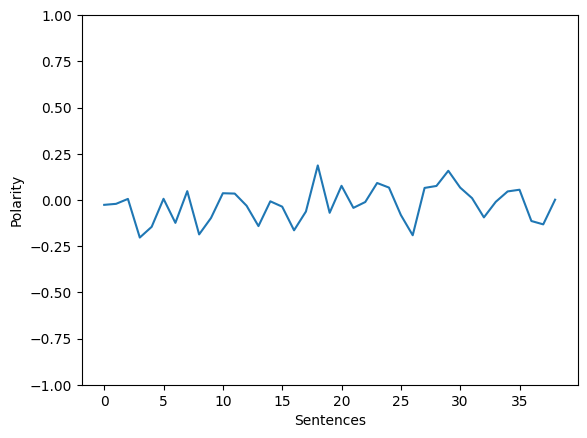

In [ ]:
# Evaluate the sentiment for each sentence in a review, and plot the variation of sentiment
import matplotlib.pyplot as plt

sentences = X_test[0].split('.')

testing_tfidf = tfidf.transform(sentences)
predictions = classifier.predict_proba(testing_tfidf)
polarity = [x[0] - x[1] for x in predictions]
# polarity = [x[0] if (x[0] > x[1]) else -x[1] for x in predictions]

plt.xlabel('Sentences')
plt.ylabel('Polarity')
plt.plot(polarity)
plt.ylim(-1, 1)

## Discussions

To solve this problem, the sklearn or scikit-learn package was used, as it is a popular machine learning library and provides lots of important tools that were useful in this lab, such as the "tf-idf" feature and other probabilistic inference models, such as the Naïve Bayes model. Notice that this package was already used in a previous lab. The online documentation can be found at https://scikit-learn.org/stable/user_guide.html.

At the same time, the nltk package was used, which is widely used for natural
language processing purposes. The online documentation can be found at https://www.nltk.org/, https://www.nltk.org/book/.

For this first case, we used the "tf-idf" feature, with a training set 80% of the data and a testing set of 20%.

The figure below presents (an example) the results outputted by the program, when using the naive Bayes model:

![Figure 3](https://github.com/LeomPina/AIreports/blob/main/w7_6.1.3.png?raw=true)

Figure 3

Notice that each run can give different results.

By analysing the previous output, we can see, once more, the metrics provided by the program for the two classes, "pos" and "neg", in which we can notice that 91% of the positive instances predicted were correct (as the precision value for this instance is 0.91), while 68% of the negative instances predicted were correct. Meanwhile, 61% of the positive instances were successfully identified (as the recall value for this instance is 0.61), while 93% of the negative instances were successfully identified. Moreover, we can see that the overall accuracy was 0.76, which means that 76% of the elements in the testing set were correctly classified (as positive or negative).

In the following figure, we can see a plot relative to the sentiment analysis of the first review in our testing set.

![Figure 4](https://github.com/LeomPina/AIreports/blob/main/w7_6.1.4.png?raw=true)

Figure 4

By looking at the plot, we can see the distributed data sample. Therefore this plot shows us how the sentiment value changed throughout the sentences, from the beginning to the end of the review.

For this second case, we just used the "tf" feature, with a training set 80% of the data and a testing set of 20%.

The figure below presents us the results outputted by the program for this second scenario:

![Figure 5](https://github.com/LeomPina/AIreports/blob/main/w7_6.1.5.png?raw=true)

Figure 5

By analysing the previous output, we can see the metrics provided by the program for the two classes, "pos" and "neg", in which we can notice that 95% of the positive instances predicted were correct (as the precision value for this instance is 0.95), while 67% of the negative instances predicted were correct. Meanwhile, 52% of the positive instances were successfully identified (as the recall value for this instance is 0.52), while 98% of the negative instances were successfully identified. Moreover, we can see that the overall accuracy was 0.75, which means that 75% of the elements in the testing set were correctly classified (as positive or negative).

In the following figure, we can see a plot relative to the sentiment analysis of the first review in our testing set, while considering the change of the feature.

![Figure 6](https://github.com/LeomPina/AIreports/blob/main/w7_6.1.6.png?raw=true)

Figure 6

By analysing these results and the different scenarios studied, we can notice that even though the results were acceptable, there were almost no differences in these outputs when opting for the "tf" or "tf-idf" feature. Some possible reasons for this similarity in results are, for example, the small and common vocabulary in these reviews, or even the possible high similarity between most reviews in this dataset.

## Task 6.2 Text Classification
###Problem Description

This next task presents a text classification problem, in which we will perform a multi-class classification, instead of only using two classes as in the previous task.

To solve this problem, we will use a dataset called "newsgroups" (from sklearn), which is a collection of messages from 20 new groups, such as comp.graphics, rec.sport.hockey, sci.space, talk.religion.misc, and others.

The following figure shows us an excerpt of a message, as an example of the type of language and writing used in the messages presented in this dataset from the comp.graphics group.

![Figure 7](https://github.com/LeomPina/AIreports/blob/main/w7_6.2.1.png?raw=true)

Figure 7

In our implemented solution for this task, once again, we will use the simple word count features, such as "tf" and "tf-idf". We are also going to use the same classification method as the one used in the previous task, the Naïve Bayes model method.

##Implementation and results
This section shows the implemented code and its respective output.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Get the training dataset for the specified categoires
categories = ['rec.sport.hockey', 'talk.religion.misc',
              'comp.graphics', 'sci.space']
training_data = fetch_20newsgroups(subset='train', categories=categories)

In [ ]:
# Create the tf-idf transformer
#tfidf = TfidfVectorizer(use_idf=True)
tfidf = TfidfVectorizer(use_idf=False)
training_tfidf = tfidf.fit_transform(training_data.data)
print(training_tfidf.shape)

# Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB().fit(training_tfidf, training_data.target)


(2154, 35956)


In [ ]:
from sklearn import metrics

testing_data = fetch_20newsgroups(subset='test', categories=categories)
testing_tfidf = tfidf.transform(testing_data.data)
predictions = classifier.predict(testing_tfidf)
print(metrics.classification_report(testing_data.target, predictions, target_names=categories))


                    precision    recall  f1-score   support

  rec.sport.hockey       0.96      0.88      0.92       389
talk.religion.misc       0.88      0.99      0.93       399
     comp.graphics       0.65      0.97      0.78       394
         sci.space       1.00      0.12      0.22       251

          accuracy                           0.81      1433
         macro avg       0.87      0.74      0.71      1433
      weighted avg       0.86      0.81      0.76      1433



In [ ]:
errors = [i for i in range(len(predictions)) if predictions[i] != testing_data.target[i]]

for i, post_id in enumerate(errors[:5]):
  print("------------------------------------------------------------------")
  print("%s --> %s\n" %(testing_data.target_names[testing_data.target[post_id]],
                      testing_data.target_names[predictions[post_id]]))
  print(testing_data.data[post_id])


------------------------------------------------------------------
comp.graphics --> sci.space

From: robert@slipknot.rain.com (Robert Reed)
Subject: Re: ACM SIGGRAPH (and ACM in general)
Reply-To: Robert Reed <robert@slipknot.rain.com>
Organization: Home Animation Ltd.
Lines: 50

In article <1993Apr29.023508.11556@koko.csustan.edu> rsc@altair.csustan.edu (Steve Cunningham) writes:
|
|And no, SIGGRAPH 93 has not skipped town -- we're preparing the best
|SIGGRAPH conference yet!

Speaking of SIGGRAPH, I just went through the ordeal of my annual registration
for SIGGRAPH and re-upping of membership in the ACM last night, and was I ever
grossed out!  The new prices for membership are almost highway robbery!

For example:

	SIGGRAPH basic fee went from $26 last year to $59 this year for the same
	thing, a 127% increase.  Those facile enough to arrange a trip to the
	annual conference could reduce this to $27 by selecting SIGGRAPH Lite,
	which means SIGGRAPH is charging an additional $32 (o

## Discussions
To find a solution to this problem, again, the sklearn or scikit-learn package was used.

For this first case, we used the "tf-idf" feature, and we used 4 different categories, such as "rec.sport.hockey", "talk.religion.misc", "comp.graphics", and "sci.space".

The figure below presents us the results outputted by the program, when using the naive Bayes model:

![Figure 8](https://github.com/LeomPina/AIreports/blob/main/w7_6.2.2.png?raw=true)

Figure 8

By analysing the previous results, we can see the metrics provided by the program for the four classes, in which we can notice that 97% of the "rec.sport.hockey" instances predicted were correct, 93% of the "talk.religion.misc" instances predicted were correct, 83% of the "comp.graphics" instances predicted were correct, and 100% of the "sci.space" instances predicted were correct. At the same time, 90% of the "rec.sport.hockey" instances were successfully identified, 99% of the "talk.religion.misc" instances were successfully identified, 98% of the "comp.graphics" instances were successfully identified, and 72% of the "sci.space" instances were successfully identified. Furthermore, we notice that the overall accuracy was 0.92, which means that 92% of the elements in the testing set were correctly classified.

For this second case, we just used the "tf" feature, while considering the same 4 categories, such as "rec.sport.hockey", "talk.religion.misc", "comp.graphics", and "sci.space".

The figure below presents us the results outputted by the program, when using the naive Bayes model, while considering the change of the feature:

![Figure 9](https://github.com/LeomPina/AIreports/blob/main/w7_6.2.3.png?raw=true)

Figure 9

By analysing the results above, we can see, once more, the metrics provided by the program for the four classes, in which we can notice that 96% of the "rec.sport.hockey" instances predicted were correct, 88% of the "talk.religion.misc" instances predicted were correct, 65% of the "comp.graphics" instances predicted were correct, and 100% of the "sci.space" instances predicted were correct. At the same time, 88% of the "rec.sport.hockey" instances were successfully identified, 99% of the "talk.religion.misc" instances were successfully identified, 97% of the "comp.graphics" instances were successfully identified, and 12% of the "sci.space" instances were successfully identified. Furthermore, we notice that the overall accuracy was 0.81, which means that 81% of the elements in the testing set were correctly classified.

Note that we can also check some of the incorrect results (so we can understand if we study more about what went wrong and why), which are presented at the end of the output when executing the program.

By analysing these results and the different scenarios studied, we can notice that when changing features, the results are approximately the same, except in the "sci.space" category, where we can see a difference in the recall value. Some possible reasons for this difference in this particular category may be, for example, the "tf-idf" method considers both the frequency of words within the documents and its frequency across the whole dataset. On the other hand, the type of language and terms used in this category can also affect the "IDF" (as there is a possibility that many terms, such as scientific ones, can only be seen in these type of documents), which ultimately can lead to better performance when exploring the "sci.space" category.

## Task 6.3 Topic Modelling
###Problem Description

This last task presents topic modelling, as we will use The LDA (latent Dirichlet allocation), which is a very popular method used for topic modelling, to distinguish and analyse the hidden semantic structures or topics of a large text collection, which can be used for various purposes, such as automatic categorisation of documents, text mining, text information retrieval, and others.

The LDA method lies in the premise that every document in a given collection contains at least one hidden topic, which means that every topic or theme is composed of a number of words. So in this problem, we will use this method to discover these underlying topics, as well as their word distribution (supporting words), which can be done by maximizing the likelihood of observing the given data, given the topics and words. It is also important to note that this method does not need to have the knowledge about any topics in the documents.

In our implemented solution for this problem, we will use as data two documents about “artificial intelligence” and “football”, which will be the documents that are present in the corpus (collection), and can be seen in the implementation section shown next.

##Implementation and results
This section shows the implemented code and its respective output.


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from gensim import models, corpora


In [ ]:
documents = [
  """
  Artificial intelligence (AI), sometimes called machine
  intelligence, is intelligence demonstrated by machines, unlike
  the natural intelligence displayed by humans and animals. Leading
  AI textbooks define the field as the study of "intelligent
  agents": any device that perceives its environment and takes
  actions that maximize its chance of successfully achieving its
  goals. Colloquially, the term "artificial intelligence" is often
  used to describe machines (or computers) that mimic "cognitive"
  functions that humans associate with the human mind, such
  as "learning" and "problem solving".
  """,
  """
  Association football, more commonly known as football or
  soccer, is a team sport played with a spherical ball between
  two teams of 11 players. It is played by approximately 250
  million players in over 200 countries and dependencies, making it
  the world's most popular sport. The game is played on a
  rectangular field called a pitch with a goal at each end. The
  object of the game is to outscore the opposition by moving the
  ball beyond the goal line into the opposing goal. The team with
  the higher number of goals wins the game.
  """
]

In [ ]:
# Clean the data by using stemming and stopwords removal
nltk.download('stopwords')
stemmer = SnowballStemmer('english')
stop_words = stopwords.words('english')
texts = [
  [stemmer.stem(word) for word in document.lower().split() if word not in stop_words]
  for document in documents
  ]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Create a dictionary from the words
dictionary = corpora.Dictionary(texts)

# Create a document-term matrix
doc_term_mat = [dictionary.doc2bow(text) for text in texts]

# Generate the LDA model
num_topics = 2
ldamodel = models.ldamodel.LdaModel(doc_term_mat,
        num_topics=num_topics, id2word=dictionary, passes=25)


In [ ]:
num_words = 5
for i in range(num_topics):
  print(ldamodel.print_topic(i, topn=num_words))

print('\nTop ' + str(num_words) + ' contributing words to each topic:')
for item in ldamodel.print_topics(num_topics=num_topics, num_words=num_words):
    print('\nTopic', item[0])
    list_of_strings = item[1].split(' + ')
    for text in list_of_strings:
        details = text.split('*')
        print("%-12s:%0.2f%%" %(details[1], 100*float(details[0])))


0.035*"intellig" + 0.035*"human" + 0.025*"machin" + 0.015*"associ" + 0.015*"call"
0.036*"team" + 0.036*"goal" + 0.036*"play" + 0.026*"game" + 0.026*"ball"

Top 5 contributing words to each topic:

Topic 0
"intellig"  :3.50%
"human"     :3.50%
"machin"    :2.50%
"associ"    :1.50%
"call"      :1.50%

Topic 1
"team"      :3.60%
"goal"      :3.60%
"play"      :3.60%
"game"      :2.60%
"ball"      :2.60%


In [ ]:
new_docs = [
  """
  Jager thinks this is just the start of AI eating the beautiful
  game. “We have a dedicated team that focuses only on artificial
  intelligence and machine learning for sports teams,” he
  says. “That is not only for soccer, but for Formula One and
  American football. We have a baseball team, and we're talking
  right now with cricket teams.”
  """
]

new_texts = [
  [stemmer.stem(word) for word in document.lower().split() if word not in stop_words]
  for document in new_docs
  ]
new_doc_term_mat = [dictionary.doc2bow(text) for text in new_texts]

vector = ldamodel[new_doc_term_mat]
print(vector[0])


[(0, 0.50678587), (1, 0.4932142)]


## Discussions
To solve this problem, the gensim package was used, which is used in natural language processing and topic modelling. More specifically, we will use the Latent Dirichlet Allocation (LDA).The online documentation can be found at https://radimrehurek.com/gensim/.

The sklearn or scikit-learn package was also used for completing this task.

Firstly, we used the 2 documents (2 topics) previously mentioned and applied the LDA method, The figure below shows us the results (an example) outputted by the program:

![Figure 10](https://github.com/LeomPina/AIreports/blob/main/w7_6.3.1.png?raw=true)

Figure 10

Notice that each run can give different results.

By analysing the previous results, we can see that the LDA model identified 2 different topics, where each of the words related, as shown above, have a significant weight to contribute to identifying the correspondent topic, so in this case, the words or terms related to artificial intelligence can be seen in "topic 0" and ones related to football can be seen in "topic 1". So we can say that higher word percentages mean that these words are more central to the related topic.

Let's now see the results when we add a new document, which can be seen in the code implementation section (along with the first ones), so we can apply the trained LDA model to this new text document, and then analyse these new results.

The new results outputted are displayed in the form of a vector structure, such as [(0, 0.50678587), (1, 0.4932142)], which indicates the computation of its projection vector, from the LDA model.

By analysing these results, we can see that regarding "topic 0", this new document presents a weight association value of 0.50678587, and regarding "topic 1", it presents a weight association value of 0.4932142. So we can agree that these results seem acceptable, as the new document talks about both topics, and therefore combine elements from both.

#Conclusion

In conclusion, after completing this Lab work by solving its tasks and problems, we can agree that by using all these methods, such as the simple word count features, "tf" and "tf-idf", the Naïve Bayes, and the LDA, we were able to find a solution for these 3 tasks. By doing so, we gained additional knowledge on how these tools and methods can be applied to solve natural language processing problems, and how these can be useful for different scenarios.

In further investigations, we could study more about other natural language processing methods, while also exploring different problems. Thus, we could also expand our corpus and add more documents and content, so we can study different kinds of results and see how these methods perform under different conditions.